Number of colors used: 3
Node colors: {0: 0, 1: 1, 2: 2, 3: 0, 4: 1, 5: 0, 6: 1, 7: 0, 8: 1}


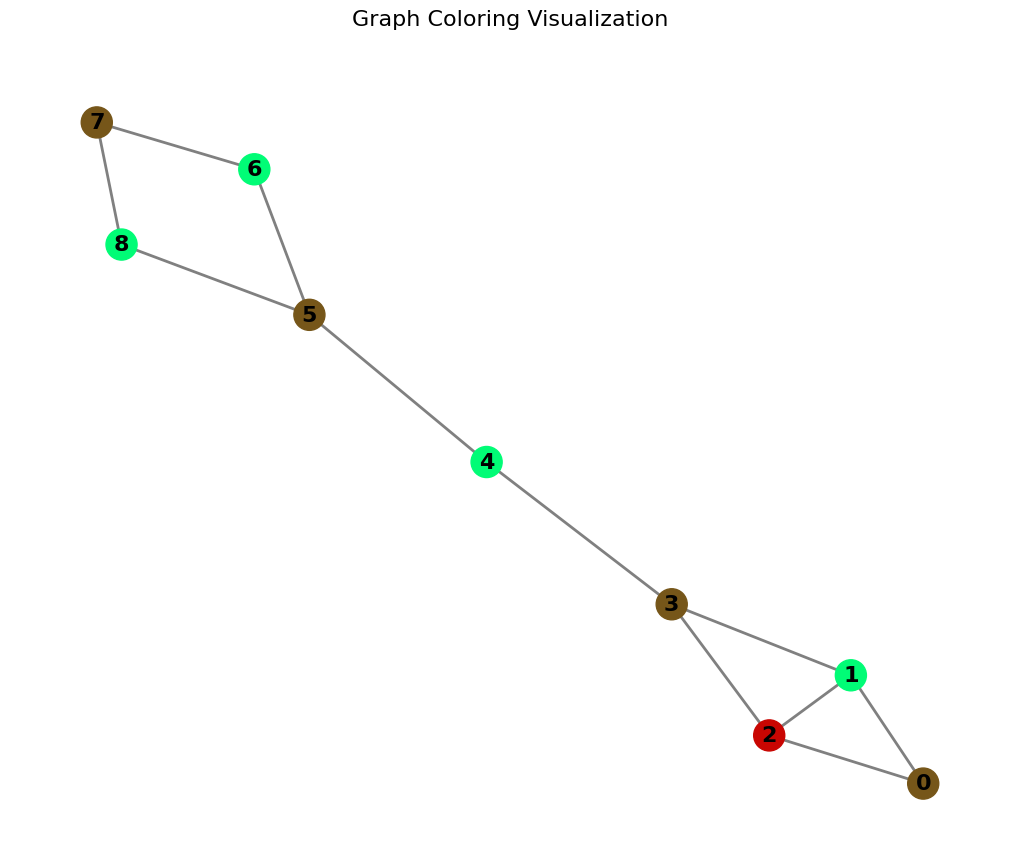

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import random

def create_sample_graph():
    """Create a sample graph for demonstration"""
    G = nx.Graph()
    edges = [
        (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4),
        (4, 5), (5, 6), (6, 7), (7, 8), (8, 5)
    ]
    G.add_edges_from(edges)
    return G

def graph_coloring(G):
    """
    Implement greedy graph coloring algorithm
    Returns a dictionary of node:color pairs
    """
    colors = {}  # Dictionary to store node colors
    # Start with first node
    nodes = list(G.nodes())
    
    # Initialize first node with first color
    colors[nodes[0]] = 0
    
    # Available colors list - we'll add colors as needed
    available_colors = [0]  
    
    # Assign colors to remaining nodes
    for node in nodes[1:]:
        # Get colors of adjacent nodes
        neighbor_colors = set(colors.get(neighbor) 
                            for neighbor in G.neighbors(node) 
                            if neighbor in colors)
        
        # Find the first available color that's not used by neighbors
        for color in range(len(available_colors) + 1):
            if color not in neighbor_colors:
                colors[node] = color
                if color not in available_colors:
                    available_colors.append(color)
                break
    
    return colors, len(available_colors)

def visualize_colored_graph(G, colors):
    """Visualize the colored graph"""
    # Create a color map for visualization
    color_map = ['#%06X' % random.randint(0, 0xFFFFFF) 
                 for _ in range(max(colors.values()) + 1)]
    
    # Map node colors to their visual colors
    node_colors = [color_map[colors[node]] for node in G.nodes()]
    
    # Set up the plot
    plt.figure(figsize=(10, 8))
    pos = nx.spring_layout(G)
    
    # Draw the graph
    nx.draw(G, pos, 
           node_color=node_colors,
           with_labels=True,
           node_size=500,
           font_size=16,
           font_weight='bold',
           width=2,
           edge_color='gray')
    
    # Add a title
    plt.title("Graph Coloring Visualization", pad=20, size=16)
    
    # Show the plot
    plt.show()

def main():
    # Create a sample graph
    G = create_sample_graph()
    
    # Color the graph
    colors, num_colors = graph_coloring(G)
    
    print(f"Number of colors used: {num_colors}")
    print("Node colors:", colors)
    
    # Visualize the result
    visualize_colored_graph(G, colors)

if __name__ == "__main__":
    main()